In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import yaml

with open('.\config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from category_encoders import wrapper
# from xgboost import XGBRegressor

In [4]:
df = pd.read_csv(cfg['datasets']['music'])
df.head()

C:\Users\CONDA\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.0495,0,0.0658,0.557,173.935,178203,Argentina,South America,Spanish,0
1,1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,...,0.724,0,0.134,0.262,81.956,183547,Argentina,South America,Spanish,0
2,2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.241,0,0.0929,0.216,137.915,204003,Argentina,South America,Spanish,0
3,3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,...,0.0924,4.6e-05,0.0534,0.832,96.018,153750,Argentina,South America,Spanish,0
4,4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,...,0.0811,6.25e-05,0.101,0.501,95.066,133895,Argentina,South America,Spanish,0


In [5]:
df.drop(
    ['Unnamed: 0', 'uri','artist_names','artist_individual','artist_id', 'artist_img', 'track_name', 'release_date', 'album_cover', 'source', 'week', ],
    axis=1,
    inplace=True
)
df

,rank,artists_num,artist_genre,collab,album_num_tracks,peak_rank,previous_rank,weeks_on_chart,streams,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,1,1,argentine hip hop,0,1,1,1,4,3003411,0.583,...,0.0495,0,0.0658,0.557,173.935,178203,Argentina,South America,Spanish,0
1,2,1,argentine indie,0,1,2,129,2,2512175,0.654,...,0.724,0,0.134,0.262,81.956,183547,Argentina,South America,Spanish,0
2,3,1,argentine hip hop,0,2,3,59,2,2408983,0.721,...,0.241,0,0.0929,0.216,137.915,204003,Argentina,South America,Spanish,0
3,5,1,urbano chileno,0,1,5,5,8,2080139,0.87,...,0.0924,4.6e-05,0.0534,0.832,96.018,153750,Argentina,South America,Spanish,0
4,6,1,pop argentino,0,1,6,9,3,1923270,0.761,...,0.0811,6.25e-05,0.101,0.501,95.066,133895,Argentina,South America,Spanish,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787994,197,2,pop,1,33,197,-1,1,37591,0.743,...,0.0188,0,0.287,0.545,110.015,231173,Vietnam,Asia,Vietnamese,0
1787995,197,2,hip hop,1,33,197,-1,1,37591,0.743,...,0.0188,0,0.287,0.545,110.015,231173,Vietnam,Asia,Vietnamese,1
1787996,199,3,mellow gold,1,17,114,183,30,36817,0.795,...,0.0354,7.25e-05,0.0915,0.934,116.032,202735,Vietnam,Asia,Vietnamese,0
1787997,199,3,pop,1,17,114,183,30,36817,0.795,...,0.0354,7.25e-05,0.0915,0.934,116.032,202735,Vietnam,Asia,Vietnamese,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787999 entries, 0 to 1787998
Data columns (total 25 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   rank              object
 1   artists_num       object
 2   artist_genre      object
 3   collab            object
 4   album_num_tracks  object
 5   peak_rank         object
 6   previous_rank     object
 7   weeks_on_chart    object
 8   streams           object
 9   danceability      object
 10  energy            object
 11  key               object
 12  mode              object
 13  loudness          object
 14  speechiness       object
 15  acousticness      object
 16  instrumentalness  object
 17  liveness          object
 18  valence           object
 19  tempo             object
 20  duration          object
 21  country           object
 22  region            object
 23  language          object
 24  pivot             object
dtypes: object(25)
memory usage: 341.0+ MB


In [7]:
df['collab'].unique()

array([0, 1, '1', 'collab', '0'], dtype=object)

In [8]:
df['collab'].value_counts()

1         614704
0         515719
1         507626
0         149877
collab        73
Name: collab, dtype: int64

In [9]:
df.shape

(1787999, 25)

In [10]:
df.set_index('collab', inplace = True)
df = df.drop('collab')
df.reset_index(inplace= True)

In [11]:
df.shape

(1787926, 25)

In [12]:
columns_to_numeric = list(df.columns)
columns_not_to_numeric = ['artist_genre', 'country', 'region', 'language']
for column in columns_not_to_numeric:
    if column in columns_to_numeric:
        columns_to_numeric.remove(column)
columns_to_numeric
df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric, errors='coerce')
#in this usage we can get different numeric types
#df.loc[:, columns_to_numeric] = pd.to_numeric(df[columns_to_numeric].values.ravel(), 'coerce').reshape(-1, len(columns_to_numeric))

C:\Users\CONDA\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787926 entries, 0 to 1787925
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   collab            int64  
 1   rank              int64  
 2   artists_num       float64
 3   artist_genre      object 
 4   album_num_tracks  float64
 5   peak_rank         int64  
 6   previous_rank     int64  
 7   weeks_on_chart    int64  
 8   streams           int64  
 9   danceability      float64
 10  energy            float64
 11  key               float64
 12  mode              float64
 13  loudness          float64
 14  speechiness       float64
 15  acousticness      float64
 16  instrumentalness  float64
 17  liveness          float64
 18  valence           float64
 19  tempo             float64
 20  duration          float64
 21  country           object 
 22  region            object 
 23  language          object 
 24  pivot             int64  
dtypes: float64(14), int64(7), object(4)
memory us

In [14]:
df['collab'].unique()

array([0, 1], dtype=int64)

In [15]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

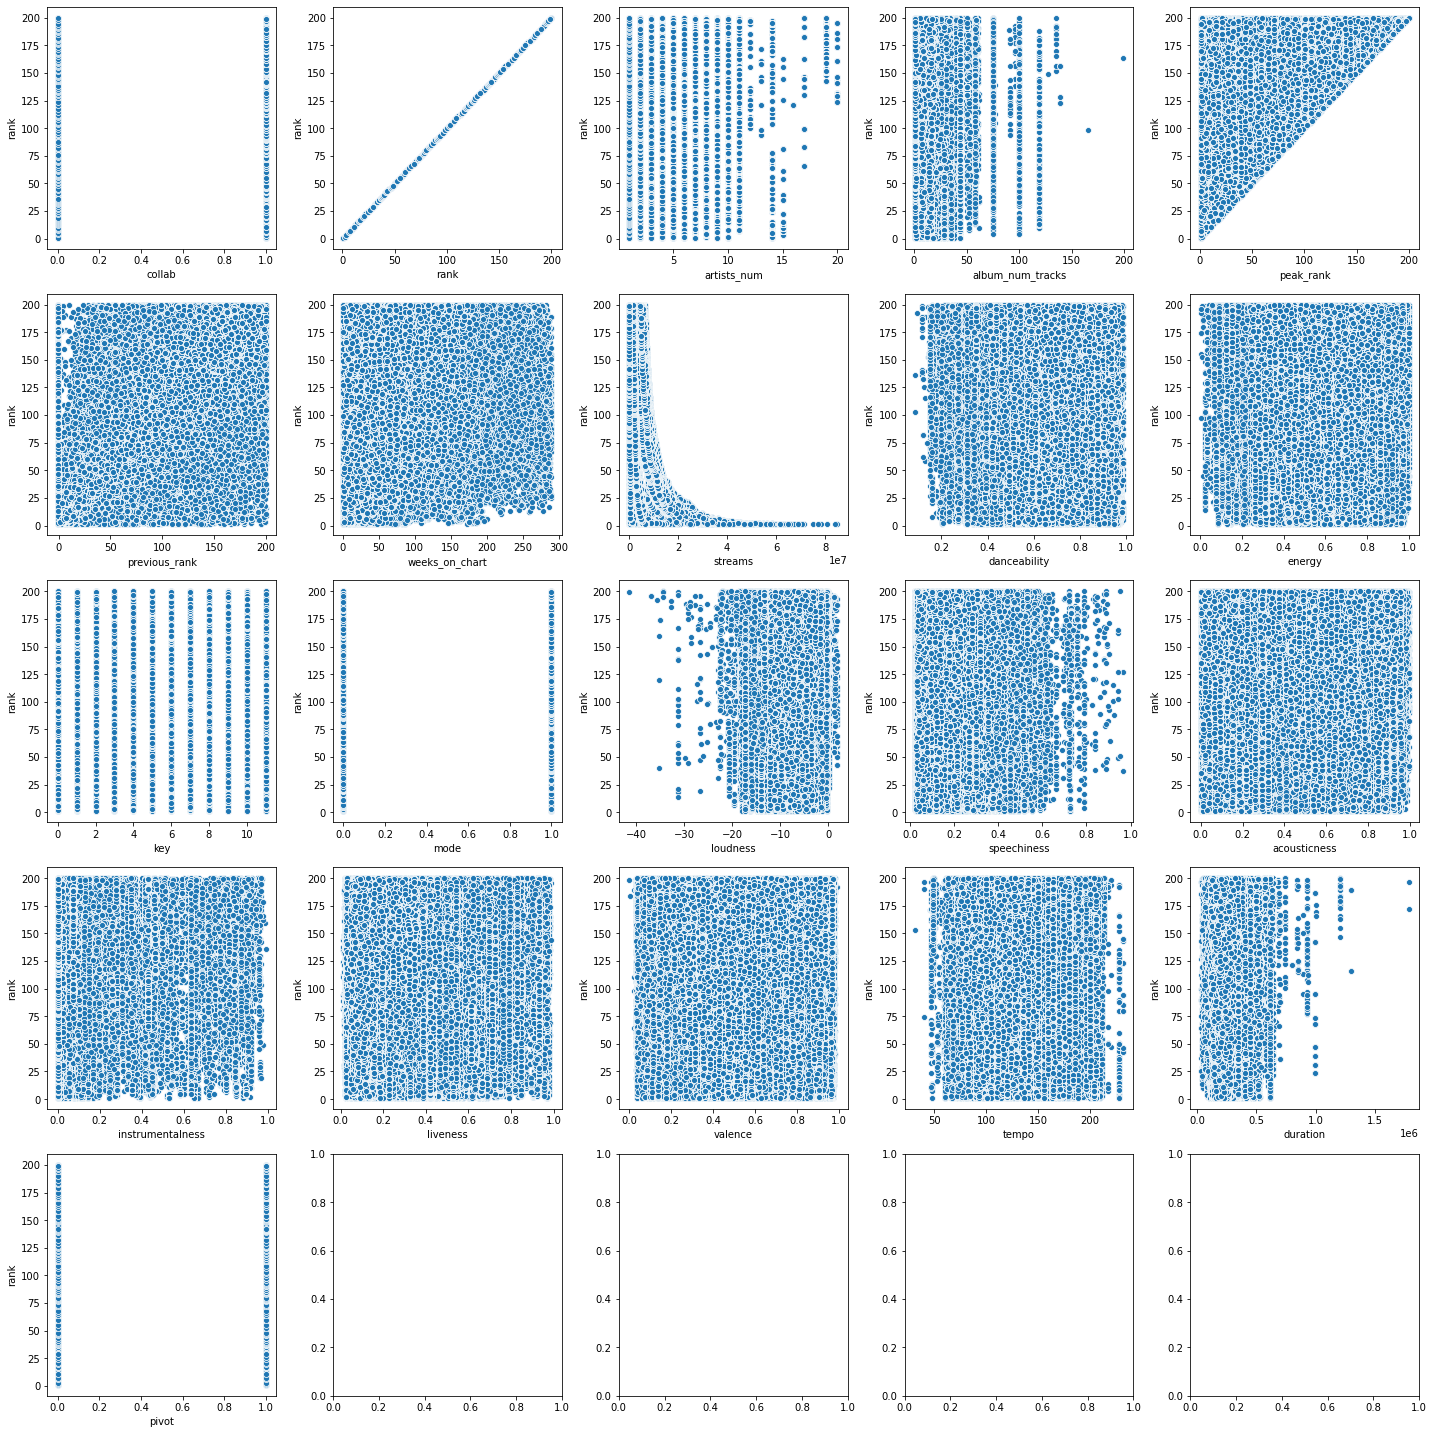

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='rank',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

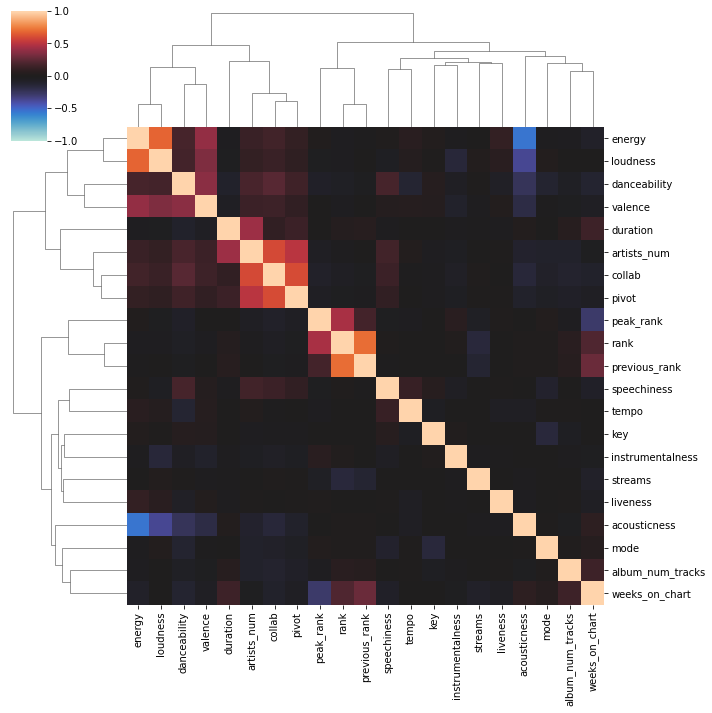

In [17]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(df, annot=None)

In [18]:
df.drop(
    ['previous_rank','energy'],
    axis=1,
    inplace=True
)

C:\Users\CONDA\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
11,loudness,0.022093
14,instrumentalness,0.022093
18,duration,0.022093
17,tempo,0.022093
16,valence,0.022093
8,danceability,0.022093
9,key,0.022093
10,mode,0.022093
15,liveness,0.022093
12,speechiness,0.022093


In [20]:
intro_srt = "Number of columns with more than"
for percent in (0.1, 0.01):
    print(f"{intro_srt} {percent}% NANs: {(nan_df.percentage > percent).sum()}")

Number of columns with more than 0.1% NANs: 0
Number of columns with more than 0.01% NANs: 11


In [21]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(1787531, 23)

In [22]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [23]:
cat_df = df.select_dtypes(include=['object'])
overfit_cat = get_almost_constant_columns(cat_df)
overfit_cat

[]

In [24]:
num_df = df.select_dtypes(exclude=['object'])
overfit_num = get_almost_constant_columns(num_df, dropna=True)
overfit_num

[]

In [ ]:
out_col = ['artists_num', 'album_num_tracks', 'loudness', 'speechiness', 'duration']

fig, axes = plt.subplots(1, 5, figsize=(15, 10))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df[col], data=df, ax=ax)
fig.tight_layout(pad=1.5)

In [ ]:
#for col, upper_bound in (
 #   ('album_num_tracks', 150),
  #  #('loudness', 100000),
  #  ('duration', 1.5)
#):
  #  df = df.drop(df[df[col] > upper_bound].index)

In [ ]:
df.shape

In [ ]:
for column in cat_df:
    print(column, cat_df[column].nunique())

In [ ]:
target_encoder = ce.TargetEncoder()
te_df_ = target_encoder.fit_transform(cat_df, df['rank'])
te_df_.head()
df_to_study_addiction_btw_region_and_country = pd.concat([num_df, te_df_], axis=1, join='inner')
corrplot(df_to_study_addiction_btw_region_and_country, annot=None)

In [ ]:
cat_df.drop(
    ['language'],
    axis=1,
    inplace=True
)

In [ ]:
target_encoder = ce.TargetEncoder()
te_df = target_encoder.fit_transform(cat_df['artist_genre'], df['rank'])
te_df.head()

In [ ]:
ohe_df = pd.get_dummies(cat_df[['region', 'country']])
ohe_df.head()

In [ ]:
num_df = df.select_dtypes(exclude=['object'])
df = pd.concat([num_df, ohe_df, te_df], axis=1, join='inner')
df